## purpose: check timestamp leakage to take the possibly true floorno

In [ ]:
import sys
sys.path.append("..")

import os
import json
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

from PIL import Image, ImageOps
from skimage import io
from skimage.color import rgba2rgb, rgb2xyz
from tqdm import tqdm
from dataclasses import dataclass
from math import floor, ceil

from main import calibrate_magnetic_wifi_ibeacon_to_position
from main import extract_magnetic_strength
from io_f import read_data_file
from visualize_f import visualize_trajectory, visualize_heatmap
from main import calibrate_magnetic_wifi_ibeacon_to_position
from main import extract_magnetic_strength
from main import extract_wifi_rssi, extract_wifi_count
from processing import SUBMISSION_SITES, split_sample_sbm_to_dataframe, formatting_for_visualize_waypoint
from tqdm import tqdm
import os

import lightgbm as lgb

sns.set()

%load_ext autoreload
%autoreload 2

## leak1: check timestamp and lasttimestamp


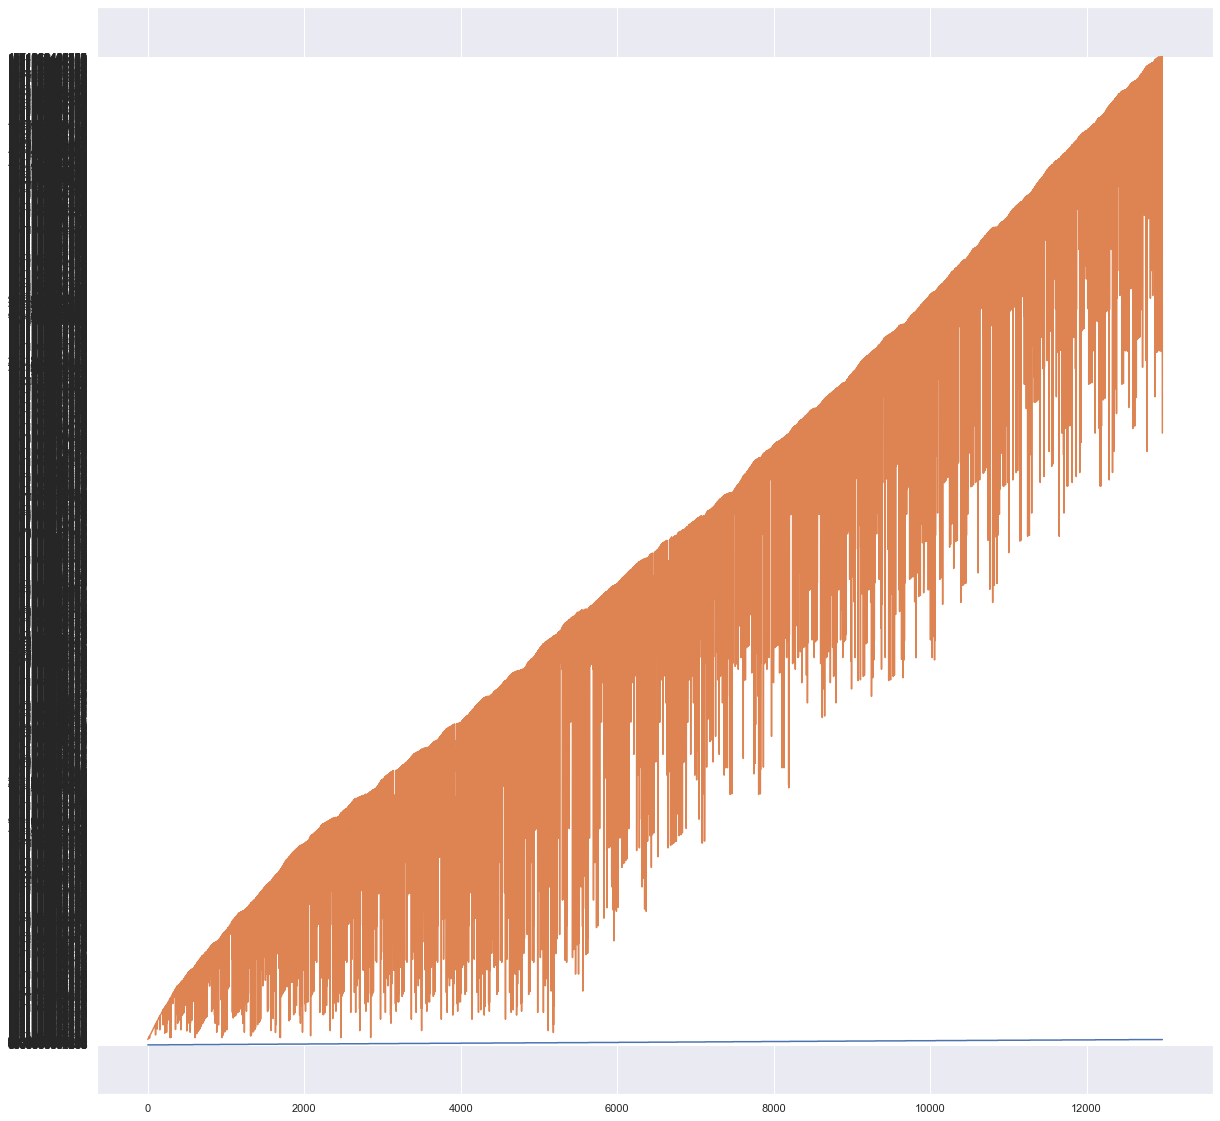

In [9]:
test_paths = glob.glob("../test/*.txt")
sample_test_path = test_paths[0]

sample_data = read_data_file(sample_test_path)
sample_wifi = sample_data.wifi
wifi_ls = []
wifi_ts = []
for val in sample_wifi:
    wifi_ls.append(val[-1])
    wifi_ts.append(val[0])

sampling = np.arange(0,len(wifi_ls),1)
fig = plt.figure(figsize=(20,20))
# for i,(a,b) in enumerate(zip(wifi_ts, wifi_ls)):
#     plt.scatter(i, a)
#     plt.scatter(i,b)
plt.plot(sampling, wifi_ts, label="timestampe")
plt.plot(sampling, wifi_ls, label="lasttime")

plt.show()

timestampとlasttimeの乖離があるのが分かる。ls野vibrationは何が原因か？<br>
lsは現実世界の日付であることが分かった。

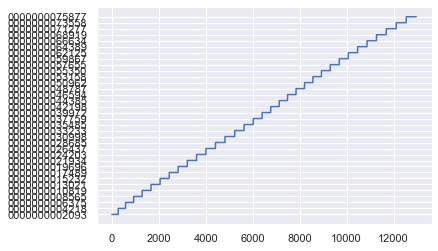

In [11]:
plt.plot(sampling,wifi_ts)

In [13]:
wifi_ls

['1571969331890',
 '1571969315536',
 '1571969315709',
 '1571969331090',
 '1571969330837',
 '1571969331087',
 '1571969331476',
 '1571969331471',
 '1571969332230',
 '1571969330960',
 '1571969332231',
 '1571969332231',
 '1571969330860',
 '1571969330857',
 '1571969331953',
 '1571969331478',
 '1571969331931',
 '1571969331891',
 '1571969332455',
 '1571969332273',
 '1571969332258',
 '1571969332469',
 '1571969332230',
 '1571969330857',
 '1571969316155',
 '1571969331211',
 '1571969330858',
 '1571969332421',
 '1571969331261',
 '1571969332195',
 '1571969331748',
 '1571969332229',
 '1571969331480',
 '1571969331450',
 '1571969331585',
 '1571969332204',
 '1571969316363',
 '1571969316338',
 '1571969330975',
 '1571969331469',
 '1571969331338',
 '1571969316448',
 '1571969316473',
 '1571969331440',
 '1571969331463',
 '1571969331791',
 '1571969331789',
 '1571969331789',
 '1571969316576',
 '1571969316452',
 '1571969316476',
 '1571969330933',
 '1571969332226',
 '1571969316163',
 '1571969331915',
 '15719693

In [ ]:


wifi_ls = []
wifi_ts = []
for p in tqdm(test_paths):
    sample_test_path = p
    sample_data = read_data_file(sample_test_path)
    sample_wifi = sample_data.wifi
    for val in sample_wifi:
        wifi_ls.append(val[-1])
        wifi_ts.append(val[0])

sampling = np.arange(0,len(wifi_ls),1)
fig = plt.figure(figsize=(20,20))
# for i,(a,b) in enumerate(zip(wifi_ts, wifi_ls)):
#     plt.scatter(i, a)
#     plt.scatter(i,b)
plt.plot(sampling, wifi_ts, label="timestampe")
plt.plot(sampling, wifi_ls, label="lasttime")

plt.show()

100%|██████████| 626/626 [02:14<00:00,  4.66it/s]
